<img src="ml3.jpg">

# Bike Share Analysis

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import gc
import csv
from datetime import datetime
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 16,\
   'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(style='dark',rc=rc)

In [25]:
default_color = '#56B4E9'
colormap = plt.cm.cool

In [26]:
# esta função será usada mais tarde para criar o mapeamento entre station e cidade
def create_station_mapping(station_data):
    """
    Cria um mapeamento (tambémm conhecido como de-para) entre a estação 
    e a cidade
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # configura o objeto csv reader - note que está sendo usado o DictReader,
            # que usa a primeira linha do arquivo como cabeçalho e cria as chaves
            # do dicionário com estes valores.
            weather_reader = csv.DictReader(f_in)

            for row in weather_reader:
                station_id = row['station_id']
                landmark = row['landmark']
                station_map[station_id] = landmark
    return station_map

In [27]:
def summarise_data(trip_in, station_data, trip_out):
    """
    Esta função recebe informações de viagem e estação e produz um novo
    arquivo de dados com um resumo condensado das principais informações de viagem.Os 
    argumentos trip_in e station_data serão listas de arquivos de dados para
    as informações da viagem e da estação enquanto trip_out especifica o local
    para o qual os dados sumarizados serão escritos.
    """
    # gera o dicionário de mapeamento entre estações e cidades
    station_map = create_station_mapping(station_data)
    
    with open(trip_out, 'w') as f_out:
        # configura o objeto de escrita de csv       
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # configura o leitor do csv
                trip_reader = csv.DictReader(f_in)

                # processa cada linha lendo uma a uma
                for row in trip_reader:
                    new_point = {}
                    
                    # converte a duração de segundos para minutos.
                    new_point['duration'] = int(row['Duration']) / 60
                    
                    # reformate strings com datas para múltiplas colunas
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.date()
                    new_point['start_year']  = trip_date.year
                    new_point['start_month'] = trip_date.month
                    new_point['start_hour']  = trip_date.hour
                    new_point['weekday']     = trip_date.weekday()                    
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # escreve a informação processada para o arquivo de saída.
                    trip_writer.writerow(new_point)
        return new_point

In [28]:
# processe os dados usando a função criada acima
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

{'duration': 6.616666666666666,
 'end_city': 'San Jose',
 'start_city': 'San Jose',
 'start_date': datetime.date(2013, 9, 30),
 'start_hour': 23,
 'start_month': 9,
 'start_year': 2013,
 'subscription_type': 'Subscriber',
 'weekday': 0}

In [29]:
# Carregue os dados novamente mostrando os dados
sample_data = pd.read_csv('201309_trip_summary.csv')
display(sample_data.head())

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.05,2013-08-29,2013,8,14,3,San Francisco,San Francisco,Subscriber
1,1.17,2013-08-29,2013,8,14,3,San Jose,San Jose,Subscriber
2,1.18,2013-08-29,2013,8,10,3,Mountain View,Mountain View,Subscriber
3,1.28,2013-08-29,2013,8,11,3,San Jose,San Jose,Subscriber
4,1.38,2013-08-29,2013,8,12,3,San Francisco,San Francisco,Subscriber


In [30]:
# Verifica o DataFrame contando o número de pontos de dados com as características de 
# tempo corretas.
question_3(sample_data)

Todas as contagens estão como esperadas.


In [31]:
trip_data = pd.read_csv(trip_out)
trip_data.head(1)

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.05,2013-08-29,2013,8,14,3,San Francisco,San Francisco,Subscriber


In [32]:
print('Existem {:d} pontos no conjunto de dados'.format(trip_data.shape[0]))
print('A duração média das viagens foi de {:.2f} minutos'.format(trip_data['duration'].mean()))
print('A mediana das durações das viagens foi de {:.2f} minutos'.format(trip_data['duration'].median()))

duration_qtiles = trip_data['duration'].quantile([.25, .5, .75]).as_matrix()
print('25% das viagens foram mais curtas do que {:.2f} minutos'.format(duration_qtiles[0]))
print('25% das viagens foram mais compridas do que {:.2f} minutos'.format(duration_qtiles[-1]))

Existem 27345 pontos no conjunto de dados
A duração média das viagens foi de 27.60 minutos
A mediana das durações das viagens foi de 10.72 minutos
25% das viagens foram mais curtas do que 6.82 minutos
25% das viagens foram mais compridas do que 17.28 minutos


In [33]:
trip_data['subscription_type'].value_counts()

Subscriber    16696
Customer      10649
Name: subscription_type, dtype: int64

## Quantidade de viagens por assinantes e clientes

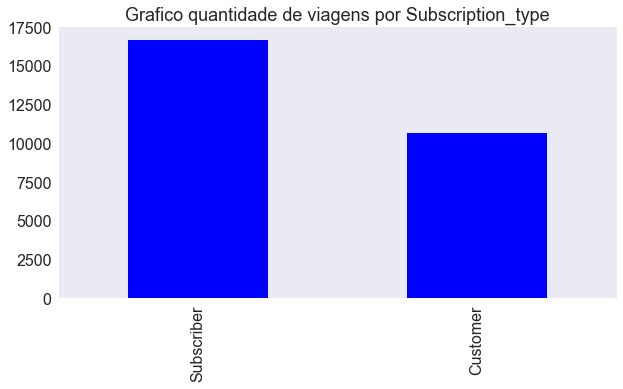

In [34]:
title = 'Grafico quantidade de viagens por Subscription_type'
trip_data['subscription_type'].value_counts().plot(kind='bar', title=title, color=['blue','red'], figsize=(10,5));

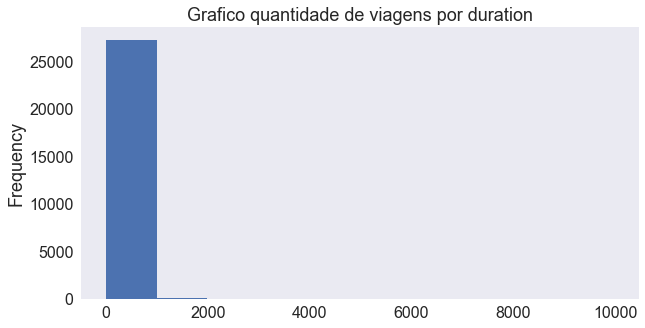

In [35]:
# Gráfico baseado nas durações
title = 'Grafico quantidade de viagens por duration'
trip_data['duration'].plot.hist(x=trip_data['duration'],title=title, figsize=(10,5))

## Quantidade de viagens abaixo de 60min

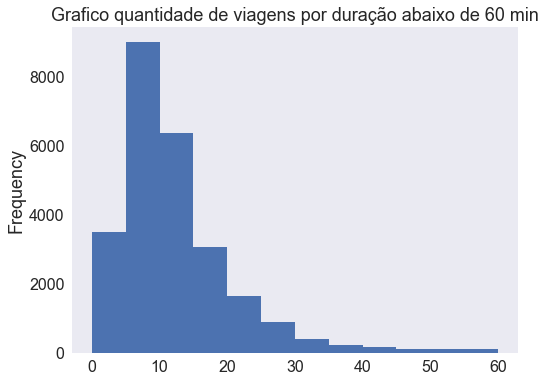

In [36]:
# Gráfico ajustado que começará no 0 e terá o bin size de 5
trip_data_m = trip_data.query('duration <60')
title = 'Grafico quantidade de viagens por duração abaixo de 60 min'
trip_data_m['duration'].plot.hist(x=trip_data_m['duration'], range=(0,60), width=5, bins=12,title=title, figsize=(8,6));

## Quantidade de viagens destino e origem entre 5 a 10min.

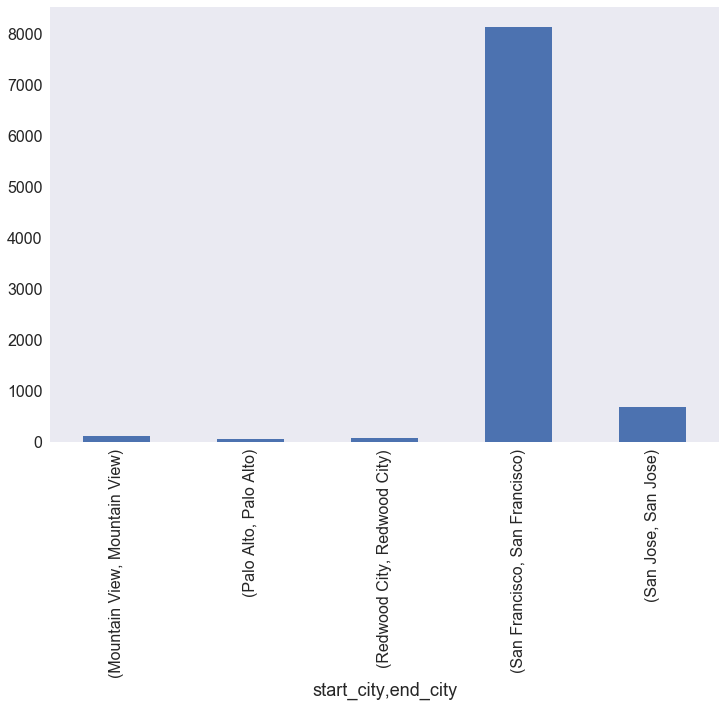

In [37]:
trip_data_viagem = trip_data[(trip_data['duration'] >= 5) & (trip_data['duration'] <= 10)]
end_start = trip_data_viagem.groupby(['start_city', 'end_city']).size()
end_start.plot(kind='bar');

In [38]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# Esta função irá ler as informações das estações e das viagens
# e escreverá um arquivo processado com o nome trip_out
summarise_data(trip_in, station_data, trip_out)

{'duration': 9.483333333333333,
 'end_city': 'San Francisco',
 'start_city': 'San Francisco',
 'start_date': datetime.date(2014, 9, 1),
 'start_hour': 0,
 'start_month': 9,
 'start_year': 2014,
 'subscription_type': 'Customer',
 'weekday': 0}

In [39]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head(1))

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.05,2013-08-29,2013,8,14,3,San Francisco,San Francisco,Subscriber


# Quantidade de rides por hora em Sao Francisco entre assinantes e clientes

In [40]:
trip_data['start_year'].value_counts()

2014    326339
2015    243057
2013    100563
Name: start_year, dtype: int64

In [41]:
trip_data_mes_2014 = trip_data.query('start_year == 2014')

In [42]:
trip_data_mes_2014['start_city'].value_counts()

San Francisco    292753
San Jose          19566
Mountain View      9520
Palo Alto          3345
Redwood City       1155
Name: start_city, dtype: int64

In [43]:
trip_data_mes_2014['subscription_type'].value_counts()

Subscriber    277763
Customer       48576
Name: subscription_type, dtype: int64

In [44]:
sub_SF = trip_data_mes_2014.query('subscription_type == "Subscriber"')
cus_SF = trip_data_mes_2014.query('subscription_type == "Customer"')

In [45]:
rides_hour_sub_SF = sub_SF['start_hour'].value_counts()
rides_hour_cus_SF = cus_SF['start_hour'].value_counts()

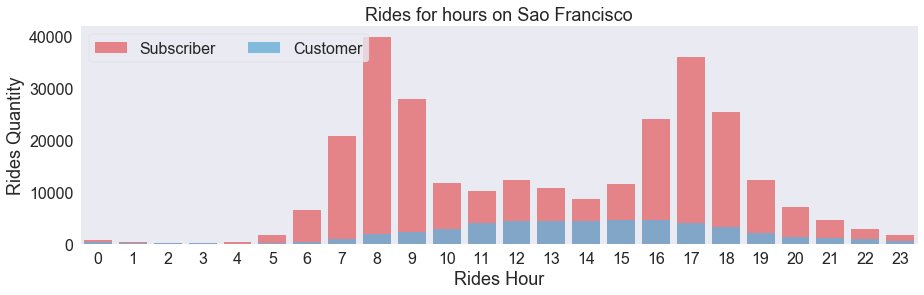

In [46]:
fig,ax = plt.subplots()
fig.set_size_inches(15,4)
sns.barplot(data=sub_SF, x=rides_hour_sub_SF.index, y=rides_hour_sub_SF.values, ax=ax, color='r', alpha=0.5, label='Subscriber')
sns.barplot(data=cus_SF, x=rides_hour_cus_SF.index, y=rides_hour_cus_SF.values, ax=ax, color=default_color, alpha=0.8, label='Customer')
ax.set(xlabel='Rides Hour', ylabel='Rides Quantity',title="Rides for hours on Sao Francisco")
ax.legend(ncol=2, loc="upper left", frameon=True)
plt.show()

# Quantidade de Rides no ano de 2014 por mês das cidade Palo Alto e Redwood City.

In [47]:
trip_data_mes_2014 = trip_data.query('start_year == 2014')

In [48]:
trip_data_mes_2014_PA = trip_data_mes_2014.query('start_city == "Palo Alto"')
trip_data_mes_2014_RC = trip_data_mes_2014.query('start_city == "Redwood City"')

In [49]:
trip_data_mes_2014_PA.shape

(3345, 9)

In [50]:
trip_data_mes_2014_RC.shape

(1155, 9)

In [51]:
rides_PA = trip_data_mes_2014_PA['start_month'].value_counts()
rides_RC = trip_data_mes_2014_RC['start_month'].value_counts()

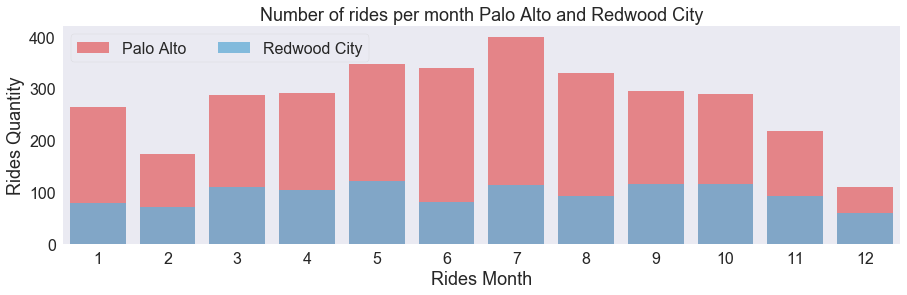

In [52]:
fig,ax = plt.subplots()
fig.set_size_inches(15,4)
plt.figure()
sns.barplot(data=trip_data_mes_2014_PA, x=rides_PA.index, y=rides_PA.values, ax=ax, color='r', alpha=0.5, label='Palo Alto')
sns.barplot(data=trip_data_mes_2014_RC, x=rides_RC.index, y=rides_RC.values, ax=ax, color=default_color, alpha=0.8, label='Redwood City')
ax.set(xlabel='Rides Month', ylabel='Rides Quantity',title="Number of rides per month Palo Alto and Redwood City")
ax.legend(ncol=2, loc="upper left", frameon=True)
plt.show()